<h2 style="color:blue" align="center">Handwritten digits classification using neural network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will than add a hidden layer and see how the performance of the model improves

In [30]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

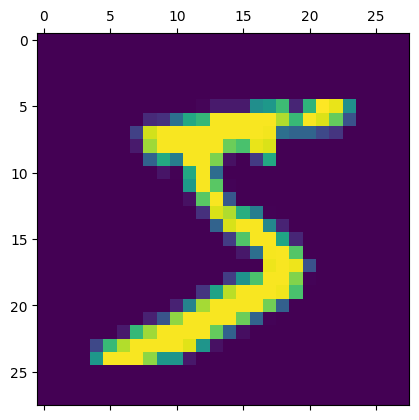

In [7]:
plt.matshow(X_train[0])

In [8]:
y_train[0]

5

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

<img src="digits_nn.jpg" />

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4735 - accuracy: 0.8761
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3037 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2730 - accuracy: 0.9240
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2668 - accuracy: 0.9262


In [15]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9242


[0.2677498161792755, 0.9241999983787537]

In [16]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([2.9127426e-02, 5.1628706e-07, 9.6983150e-02, 9.5525640e-01,
       3.1277793e-03, 1.5441775e-01, 1.6830747e-06, 9.9982399e-01,
       1.1790707e-01, 7.3062098e-01], dtype=float32)

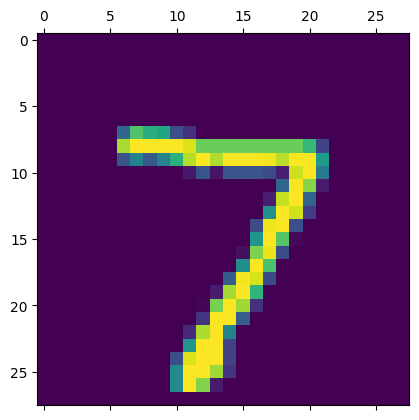

In [17]:
plt.matshow(X_test[0])

**np.argmax finds a maximum element  from an array and returns the index of it**

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [20]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [21]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    5,    4,    3,    1,    0],
       [   0, 1118,    2,    2,    0,    1,    4,    2,    6,    0],
       [   7,   10,  922,   11,    7,    5,   13,   10,   42,    5],
       [   6,    0,   21,  899,    0,   38,    2,   12,   23,    9],
       [   2,    1,    8,    0,  909,    0,    8,    4,    9,   41],
       [  10,    3,    5,   18,    9,  792,   12,    6,   29,    8],
       [  13,    3,    9,    1,    7,   15,  906,    2,    2,    0],
       [   1,    7,   24,    6,    7,    0,    0,  943,    3,   37],
       [   7,   11,    6,   18,    9,   28,    9,   11,  866,    9],
       [  11,    7,    1,    9,   29,    7,    0,   18,    5,  922]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

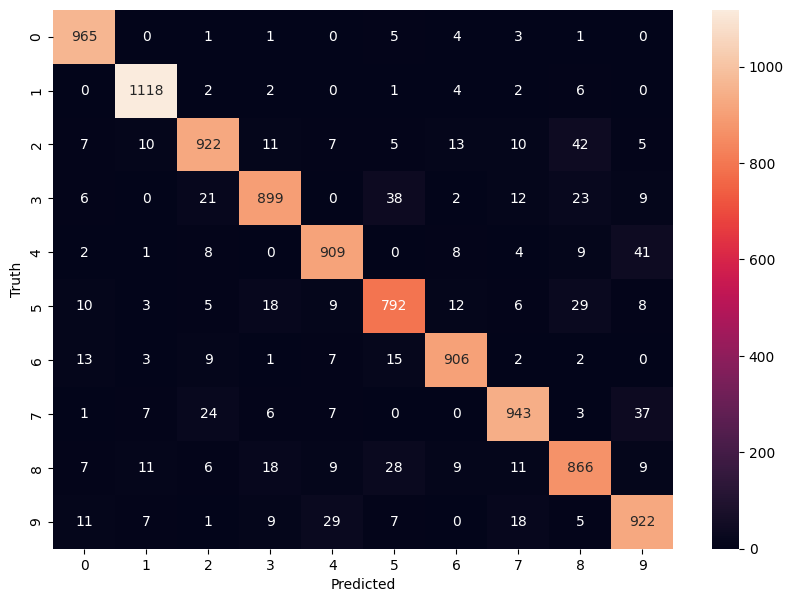

In [22]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [41]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation="relu", name="L1"),
    keras.layers.Dense(10, activation='sigmoid', name="L2")
], name = "my_model")

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.3760 - accuracy: 0.8955
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2123 - accuracy: 0.9388
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1706 - accuracy: 0.9501
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1457 - accuracy: 0.9578
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1310 - accuracy: 0.9614


In [43]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.1377 - accuracy: 0.9587


[0.13765846192836761, 0.9587000012397766]

313/313 [==============================] - 2s 6ms/step


Text(95.72222222222221, 0.5, 'Truth')

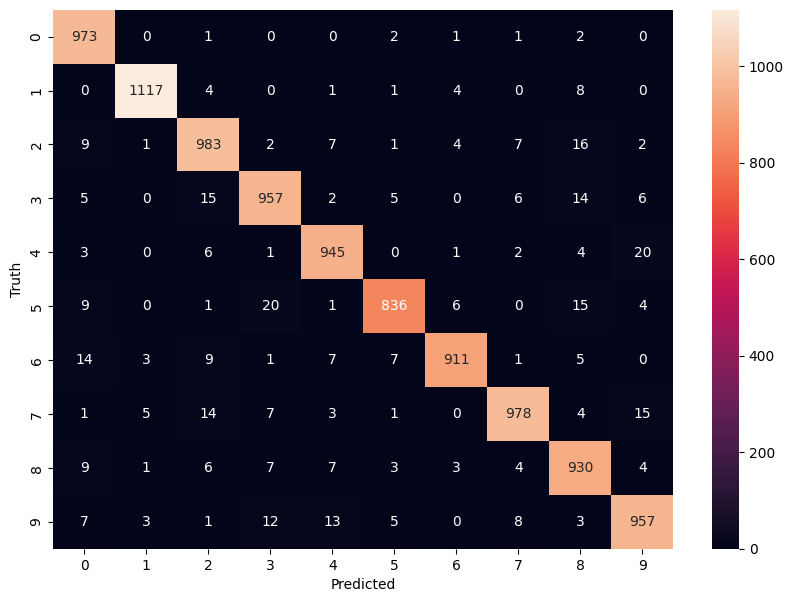

In [44]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(25, activation="relu", name="L1"),
    keras.layers.Dense(15, activation="relu", name="L2"),
    keras.layers.Dense(10, activation='sigmoid', name="L3")
], name = "my_model")

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4038 - accuracy: 0.8842
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2125 - accuracy: 0.9392
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1767 - accuracy: 0.9485
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1535 - accuracy: 0.9552
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1391 - accuracy: 0.9594
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1262 - accuracy: 0.9631
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1176 - accuracy: 0.9649
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1093 - accuracy: 0.9672
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1022 - accuracy: 0.9698
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.095

In [46]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1430 - accuracy: 0.9591


[0.14304858446121216, 0.9591000080108643]

In [47]:
import matplotlib.pyplot as plt

def plot_loss_tf(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.title('Training Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


<h3 style='color:purple'> Ideally, the cost will decrease as the number of iterations of the algorithm increases. Tensorflow refers to the cost as loss. Above, you saw the loss displayed each epoch as model.fit was executing. The .fit method returns a variety of metrics including the loss. This is captured in the history variable above. This can be used to examine the loss in a plot as shown below</h3>

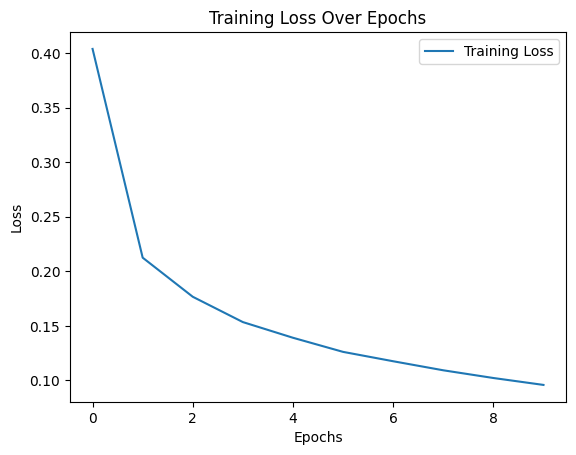

In [48]:
plot_loss_tf(history)

In [49]:
y_predicted = model.predict(X_test)
y_predicted[0]

313/313 [==============================] - 1s 1ms/step


array([4.0549901e-04, 3.3526577e-04, 5.3718549e-01, 8.8446444e-01,
       6.6417226e-05, 4.0045665e-03, 5.0490662e-08, 9.9986839e-01,
       1.6749080e-03, 1.3472873e-01], dtype=float32)

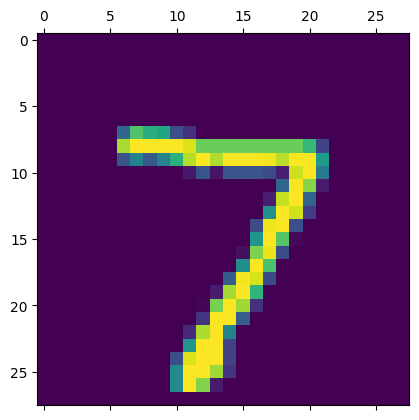

In [50]:
plt.matshow(X_test[0])

In [51]:
np.argmax(y_predicted[0])

7